<a href="https://colab.research.google.com/github/PosgradoMNA/IAyAA_Equipo_64/blob/main/semana7/notebook/MNA_IAyAA_semana_7_Actividad_Equipo64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Andres Javier Galindo Vargas - A01793927
* Diego Alberto Olarte Mira - A01794028
* Fredy Reyes Sanchez
* Jose Antonio Saenz Ramirez - A01793884
* Roberto Vega Alanis - A01378921


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [152]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math #Esta libreria la usamos lara el ramsey y el Mape
from sklearn.preprocessing import QuantileTransformer #Esta libreria la usamos al graficar datos
from sklearn.preprocessing import power_transform # para transformaión box-cox de variable objetivo
from sklearn.preprocessing import PowerTransformer
 
from sklearn.base import BaseEstimator, TransformerMixin #Creacion de custom transformer

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.dummy import DummyRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import requests, zipfile #Librerira para zip de nuestros origen de datos
from io import BytesIO
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import os
from google.colab import drive

In [2]:
# se descargar el archivo del sitio  https://archive.ics.uci.edu/ml/machine-learning-databases/00522/
# se sube a la ruta a repositorio GitHub del equipo y se hace la lectura del archivo.
df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/IAyAA_Equipo_64/main/semana7/dataset/dataset_Facebook.csv',delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


#**Ejercicio-1.** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [4]:
# realiza el cambio a los nombres de las columna LPE
df.rename(columns = {
    'Lifetime People who have liked your Page and engaged with your post':'LPE'
}, inplace = True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# Varibles de entrada
* Category  
* Page total likes 
* type
* Post month
* Post hour
* Post weekday
* Paid

# Varibles de salida 

* Lifetime people who have liked a page and engaged with a post


#**Ejercicio-2.**

# Seleccion de datos 

In [ ]:
# Selección de variables predictoras especificadas
best_X_vars = ['Category','Page total likes','Type','Post Month','Post Hour','Post Weekday','Paid']

# Creción de set  de entrenamiento
x_data = df[best_X_vars]
x_data

In [ ]:
# Nombre de la variable apbjetivo solicitada
best_y_var = ['Lifetime People who have liked your Page and engaged with your post']

# Renombramos la variable de salida
df = df.rename(columns = {best_y_var[0]:'LPE'})

# Apartamos dicha columna de datos objetivo
y_data = df['LPE']

y_data

In [130]:
# Valores en entrada en X y variables de salida Y

# Selección de variables predictoras especificadas
best_X_vars = ['Category','Page total likes','Type','Post Month','Post Hour','Post Weekday','Paid']

X = df[best_X_vars]
y = df['LPE']
# Datos de entrenamiento y test, función trains_test_split
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=100, random_state=1)
X_trainVal.head()
X_trainVal.describe()
print(X_trainVal.shape)
print(X_test.shape)
print(y_trainVal.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


#**Ejercicio-3.**

In [14]:
# Funciones de metricas

import math
# función: mi_RMSE:

def mi_RMSE(y_val, yhatVal):
  MSE = np.square(np.subtract(y_val,yhatVal)).mean()
  return math.sqrt(MSE)


# función: mi_MAE:

def mi_MAE(y_val, yhatVal):
  #y_val, yhatVal = np.array(y_val), np.array(yhatVal)
  return np.mean(np.abs(y_val - yhatVal))


# función: mi_MAPE:
def mi_MAPE(y_val, yhatVal):
  return np.mean(np.abs((y_val - yhatVal)/y_val))*100


#**Ejercicio-4.**

In [131]:
# limpieza de datos 

#1. datos nulos de entrada
X_trainVal.isnull().sum()


Category            0
Page total likes    0
Type                0
Post Month          0
Post Hour           0
Post Weekday        0
Paid                1
dtype: int64

In [132]:
# 2. validacion de datos nulos Variable de salida
y_trainVal.isnull().sum()


0

In [136]:
# 3. Clasificacion tipos de variables 

val_cate = ['Category', 'Type']
val_num = ['Page total likes'] #Aqui recordar no poner LPE porque es la salida
val_ordi = ['Post Month', 'Post Hour','Post Weekday']
val_bina = ['Paid']
val_output = ['LPE']




In [135]:
# 4. realizar la imputacion


pipeline_categorico = Pipeline(steps = [('imputacionModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
pipeline_numerico = Pipeline(steps = [('imputacionMediana', SimpleImputer(strategy='median')),('scalar', MinMaxScaler(feature_range=(1,2)))])
entrada_preparada = ColumnTransformer(transformers = [('numpipe', pipeline_numerico, np.concatenate((val_num,
                                                                                                        val_ordi, 
                                                                                                        val_bina), axis = 0)),
                                                        ('catohe', pipeline_categorico, val_cate)], #Why el concatenate, idont nou
                                        remainder='passthrough')

'''columnas_categoricas = ['Category', 'Type']
columnas_numericas = ['Page total likes'] #Aqui recordar no poner LPE porque es la salida
columnas_ordinales = ['Post Month', 'Post Hour','Post Weekday']
columnas_binarias = ['Paid']'''


"columnas_categoricas = ['Category', 'Type']\ncolumnas_numericas = ['Page total likes'] #Aqui recordar no poner LPE porque es la salida\ncolumnas_ordinales = ['Post Month', 'Post Hour','Post Weekday']\ncolumnas_binarias = ['Paid']"

(array([218., 113.,  26.,  18.,  11.,   6.,   2.,   3.,   1.,   2.]),
 array([   9. ,  439.9,  870.8, 1301.7, 1732.6, 2163.5, 2594.4, 3025.3,
        3456.2, 3887.1, 4318. ]),
 <a list of 10 Patch objects>)

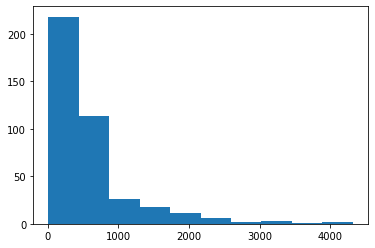

In [158]:
plt.hist(y_trainVal)

In [160]:
#Transformacion variable de salida para lograr la condicion de normalidad para la regresion

#Crear Custom transformer para convertir la data al formato adecuado de boxcox

class BoxCoxFormat(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Perform arbitary transformation
        return X.to_numpy().reshape(-1,1)

power = PowerTransformer(method='box-cox')

pipeline = Pipeline(steps=[('f', BoxCoxFormat()),('box-cox', power)])
data = pipeline.fit_transform(y_trainVal)

(array([  3.,   2.,   3.,  18.,  59., 173.,  75.,  33.,  26.,   8.]),
 array([-4.18255789, -3.46391812, -2.74527836, -2.0266386 , -1.30799883,
        -0.58935907,  0.12928069,  0.84792046,  1.56656022,  2.28519998,
         3.00383975]),
 <a list of 10 Patch objects>)

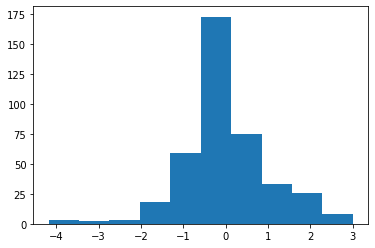

In [161]:
plt.hist(data)

#**Ejercicio-5.**

In [162]:
# Datos de entrenamiento y validacion, función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=100, random_state=1)
X_train.head()
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(300, 7)
(100, 7)
(300,)
(100,)


In [163]:
modeloDummy = DummyRegressor()

In [164]:
pipeline = Pipeline(steps=[('ct',entrada_preparada),('m',modeloDummy)])
pipeline = TransformedTargetRegressor(regressor=pipeline, func=np.log, inverse_func=np.exp)

###FALTA INCLUIR PIPELINE VARIABLE SALIDA

In [166]:
pipeline.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('ct',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('numpipe',
                                                                                       Pipeline(steps=[('imputacionMediana',
                                                                                                        SimpleImputer(strategy='median')),
                                                                                                       ('scalar',
                                                                                                        MinMaxScaler(feature_range=(1,
                                                                                                                                    2)))]),
                 

In [167]:
y_hat_val = pipeline.predict(X_val)
y_hat_train = pipeline.predict(X_train)

In [168]:
print("RMSE Conjunto entrenamiento: ",mi_RMSE(y_train,y_hat_train))
print("RMSE Conjunto validacion: ",mi_RMSE(y_val,y_hat_val))

RMSE Conjunto entrenamiento:  642.3923587670549
RMSE Conjunto validacion:  633.2385646899504


In [169]:
print("MAE Conjunto entrenamiento: ",mi_MAE(y_train,y_hat_train))
print("MAE Conjunto validacion: ",mi_MAE(y_val,y_hat_val))

MAE Conjunto entrenamiento:  331.27840882253804
MAE Conjunto validacion:  374.6000000000001


In [170]:
print("MAE Conjunto entrenamiento: ",mi_MAPE(y_train,y_hat_train))
print("MAE Conjunto validacion: ", mi_MAPE(y_val,y_hat_val))




MAE Conjunto entrenamiento:  79.35744624454472
MAE Conjunto validacion:  126.10258834302972


#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**